In [211]:
import numpy as np

In [212]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

In [213]:
df.shape

(20640, 9)

In [214]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [216]:
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

In [217]:
missing_value = df.isnull().sum()
missing_value

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [218]:
df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

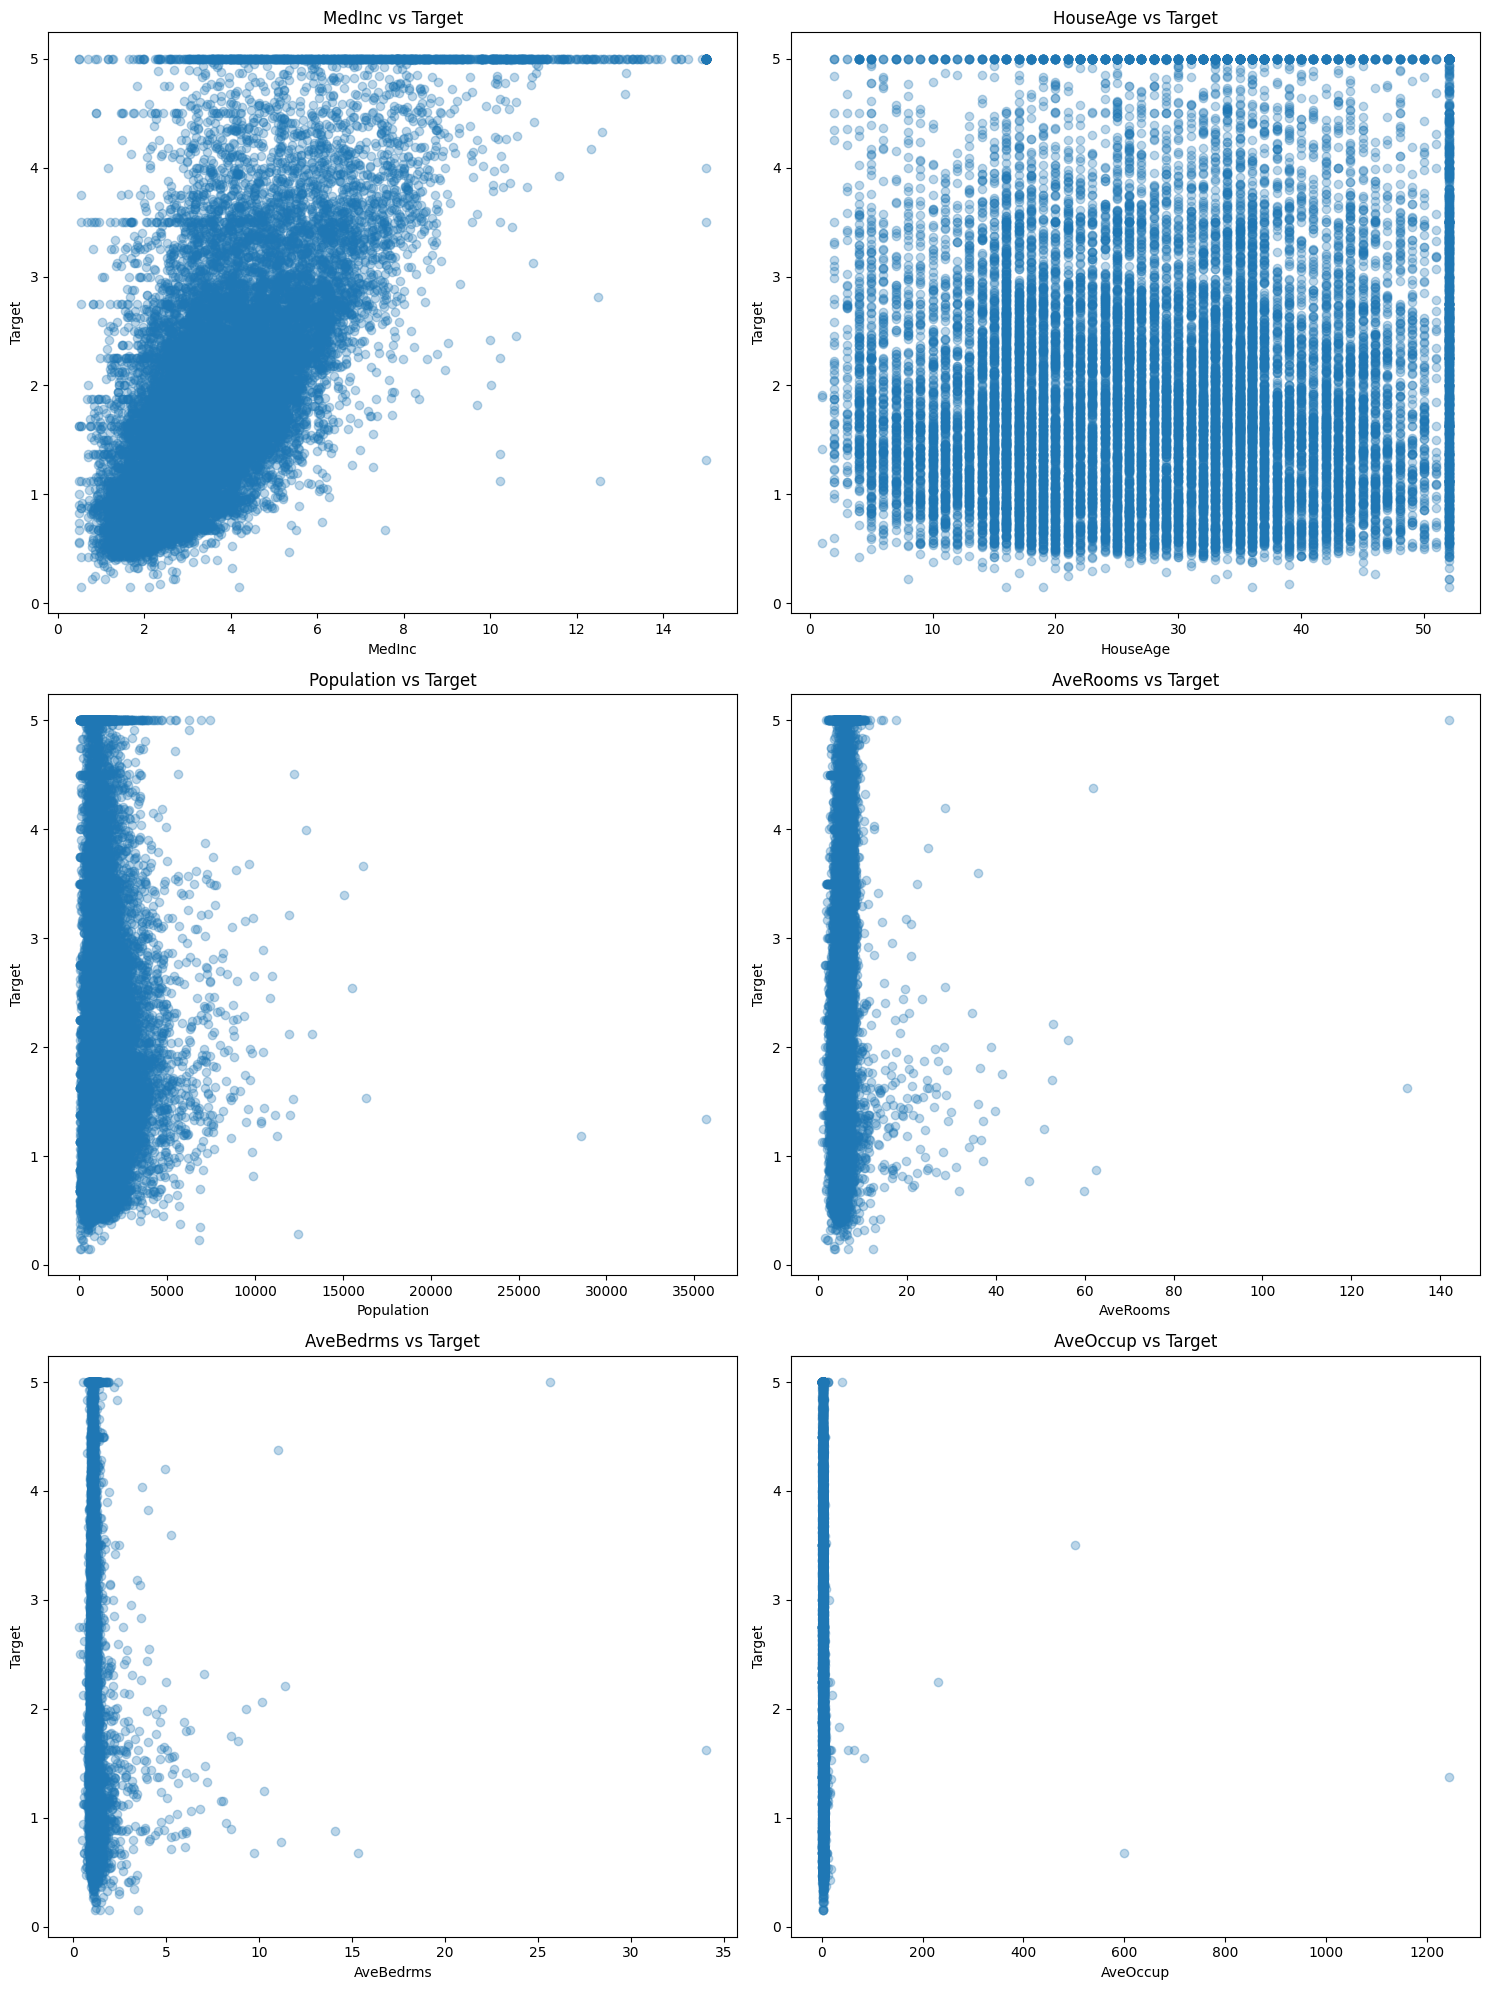

In [219]:
import matplotlib.pyplot as plt

columns = ["MedInc", "HouseAge", "Population", "AveRooms", "AveBedrms", "AveOccup"]
n_cols = 2
n_rows = int(np.ceil(len(columns) / n_cols))

plt.figure(figsize=(15, 20))

for i, col in enumerate(columns):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.scatter(df[col], df["target"], alpha=0.3)
    plt.title(f"{col} vs Target")
    plt.xlabel(col)
    plt.ylabel("Target")

plt.tight_layout()
plt.show()

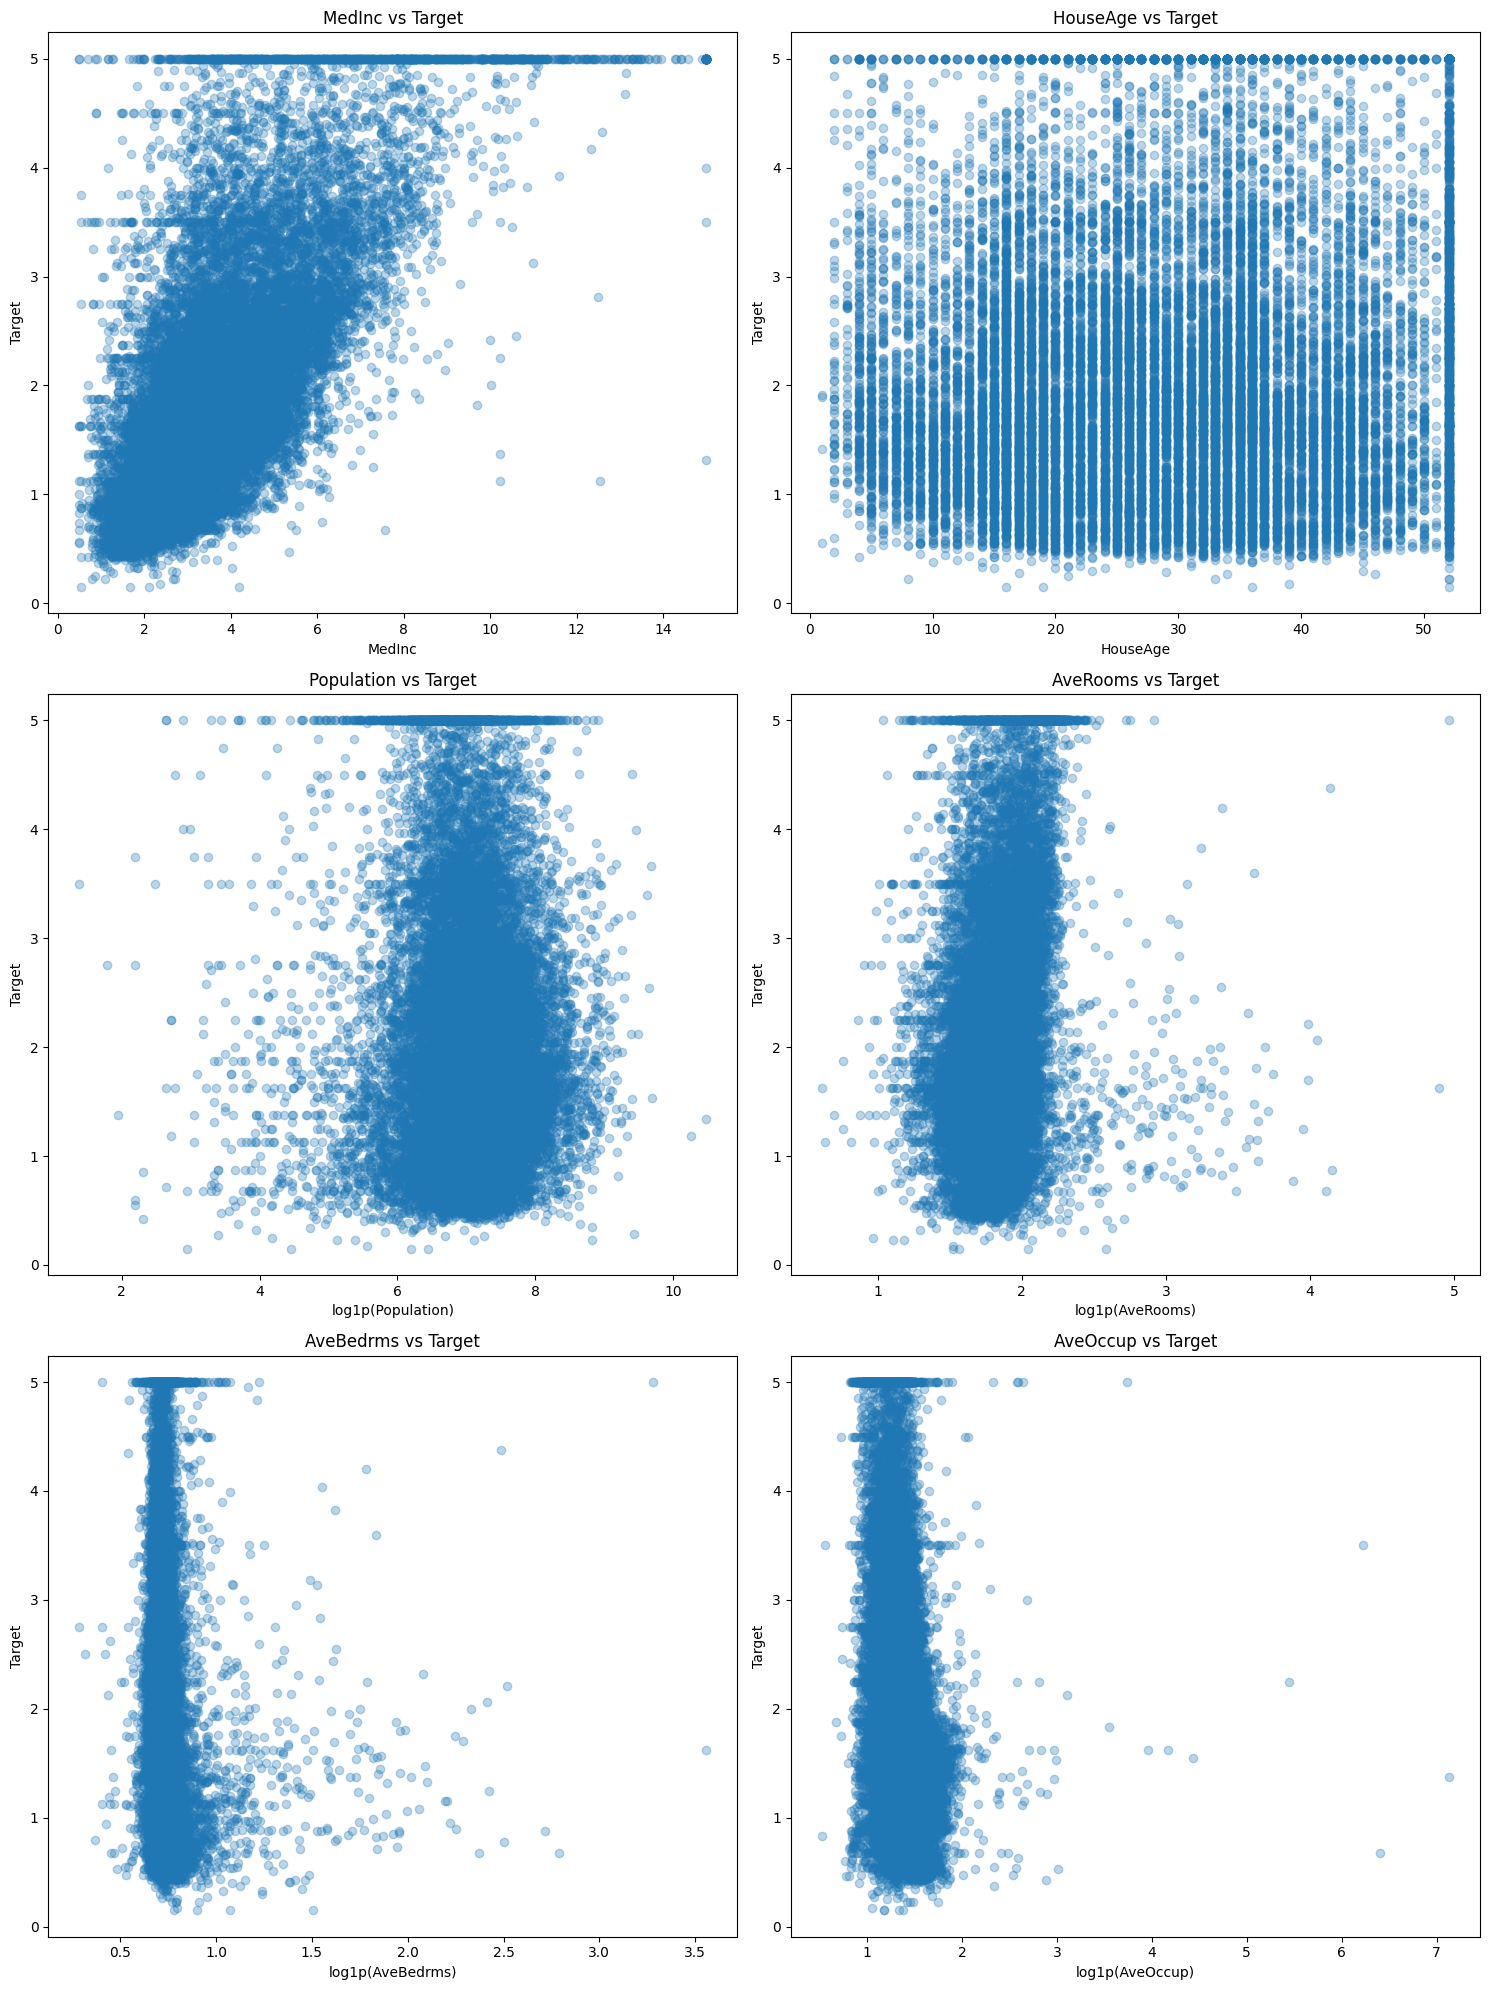

In [220]:
columns = ["MedInc", "HouseAge", "Population", "AveRooms", "AveBedrms", "AveOccup"]
n_cols = 2
n_rows = int(np.ceil(len(columns) / n_cols))

plt.figure(figsize=(15, 20))

for i, col in enumerate(columns):
    plt.subplot(n_rows, n_cols, i + 1)
    
    if col in ["Population", "AveRooms", "AveBedrms", "AveOccup"]:
        x = np.log1p(df[col])
        xlabel = f"log1p({col})"
    else:
        x = df[col]
        xlabel = col
    
    plt.scatter(x, df["target"], alpha=0.3)
    plt.title(f"{col} vs Target")
    plt.xlabel(xlabel)
    plt.ylabel("Target")

plt.tight_layout()
plt.savefig("best_fixed.png") 
plt.show()

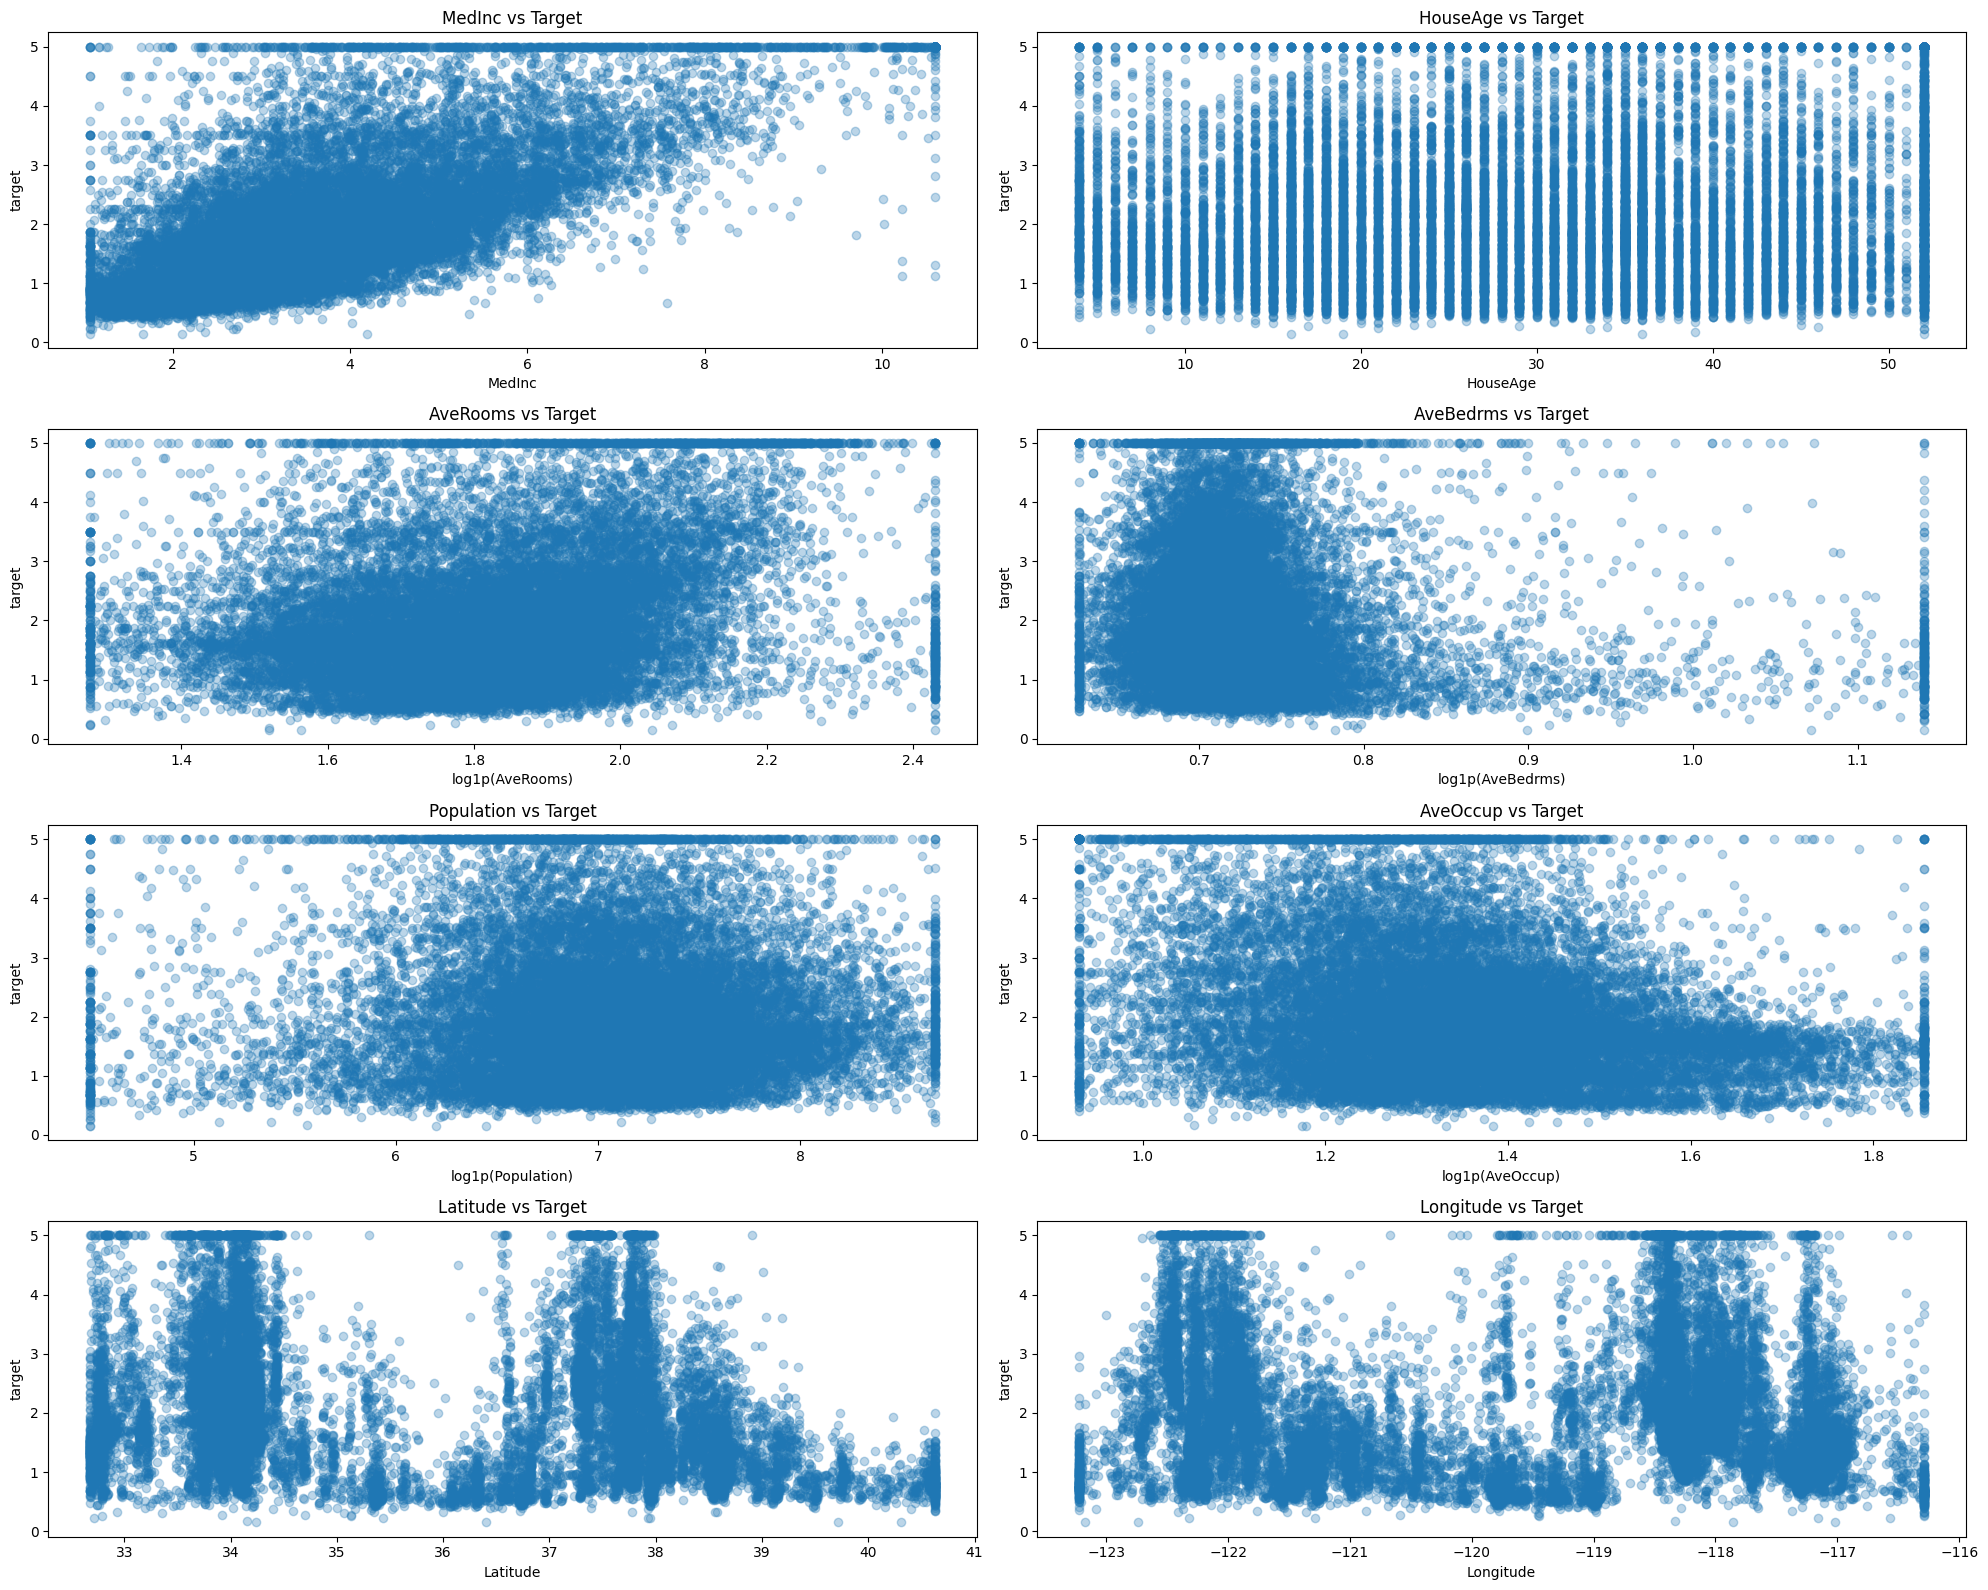

In [221]:
columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


n_cols = 2
n_rows = int(np.ceil(len(columns) / n_cols))

plt.figure(figsize=(20, n_rows * 4))

for i, col in enumerate(columns):
    plt.subplot(n_rows, n_cols, i + 1)
    
    low, high = np.percentile(df[col], [1, 99])
    clipped = df[col].clip(lower=low, upper=high)
    
    if col in ["Population", "AveRooms", "AveBedrms", "AveOccup"]:
        x = np.log1p(clipped)
        xlabel = f"log1p({col})"
    else:
        x = clipped
        xlabel = f"{col}"
    
    plt.scatter(x, df["target"], alpha=0.3)
    plt.xlabel(xlabel)
    plt.ylabel("target")
    plt.title(f"{col} vs Target")

plt.tight_layout()
plt.savefig("best_fixed.png")
plt.show()

In [222]:
df["Population"].skew()

np.float64(4.93585822672712)

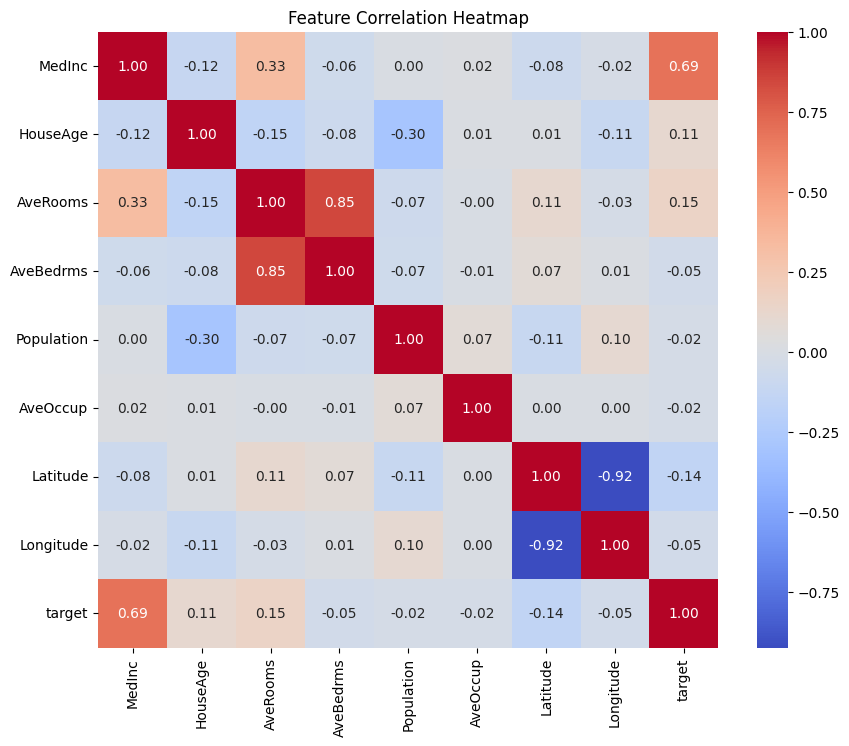

In [223]:
import seaborn as sns
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


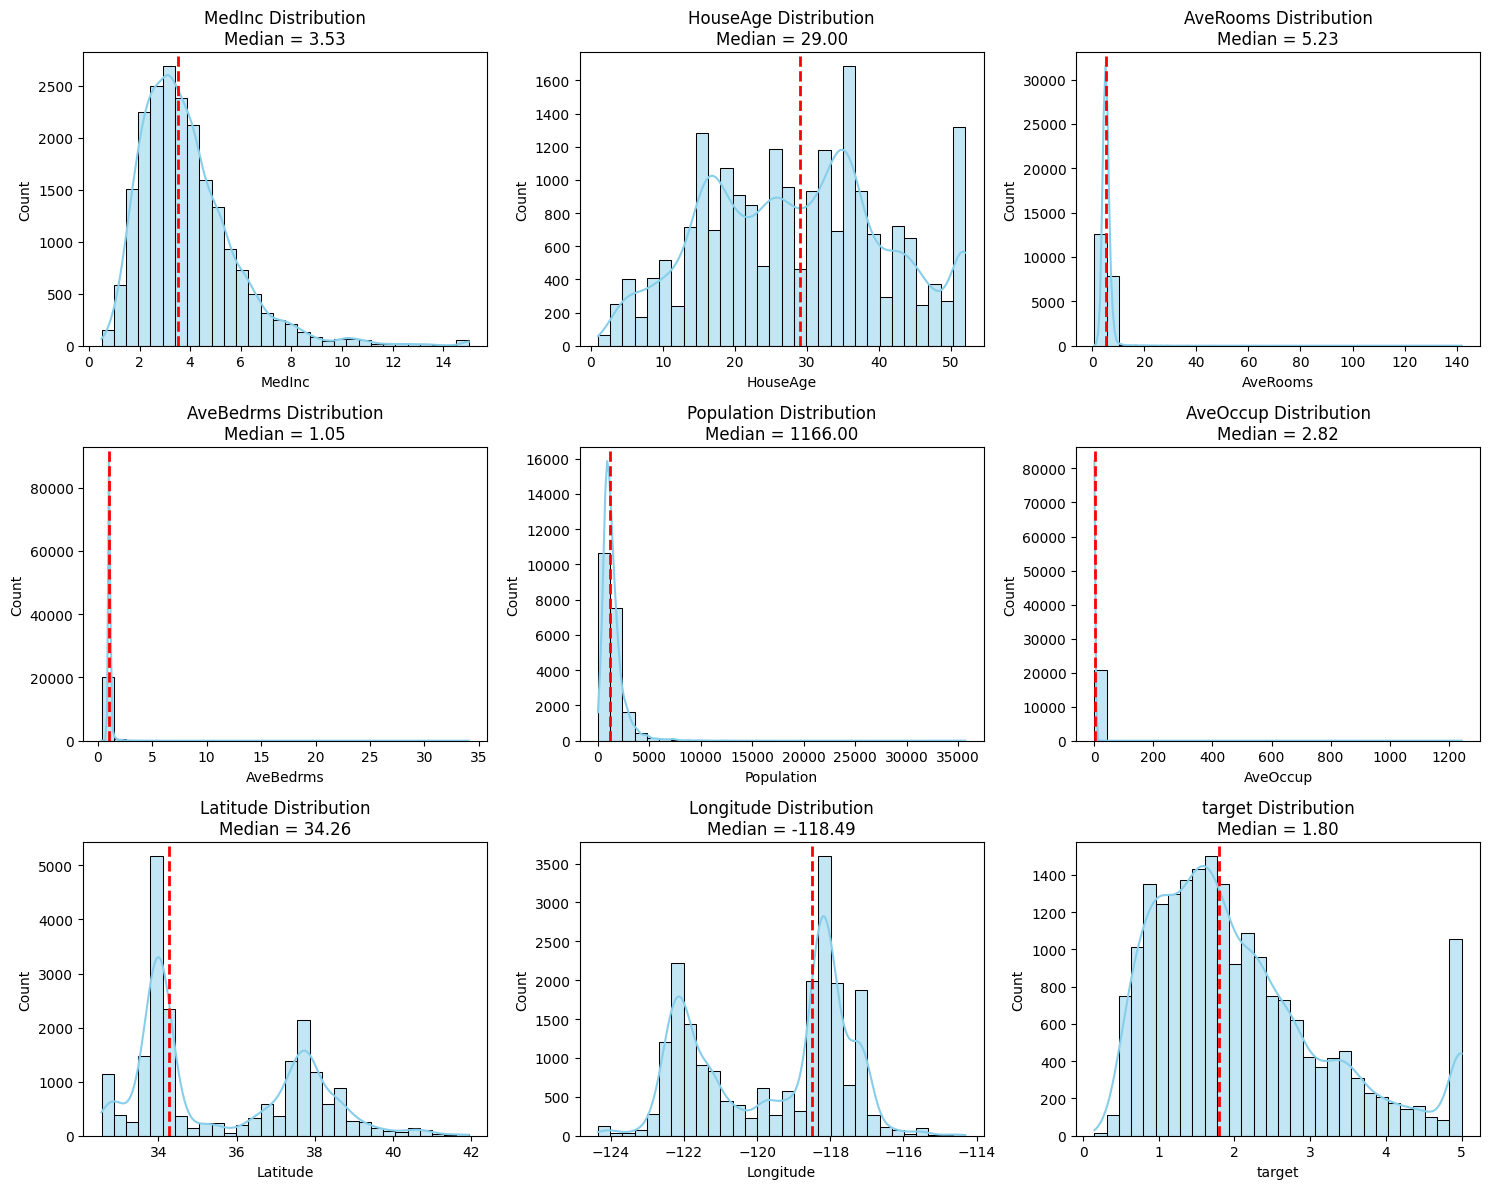

In [224]:
import seaborn as sns
import numpy as np

# Assume df is your DataFrame
columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 
           'Population', 'AveOccup', 'Latitude', 'Longitude', 'target']

plt.figure(figsize=(15, 12))

for idx, col in enumerate(columns):
    plt.subplot(3, 3, idx + 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', edgecolor='black')
    
    # Plot the median line
    median_val = df[col].median()
    plt.axvline(median_val, color='red', linestyle='dashed', linewidth=2)
    
    plt.title(f'{col} Distribution\nMedian = {median_val:.2f}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.savefig("bestdsfd")
plt.show()

In [225]:
df['Log_MedInc'] = np.log1p(df['MedInc'])
df['Log_AveRooms'] = np.log1p(df['AveRooms'])
df['Log_AveBedrms'] = np.log1p(df['AveBedrms'])
df['Log_Population'] = np.log1p(df['Population'])
df['Log_AveOccup'] = np.log1p(df['AveOccup'])


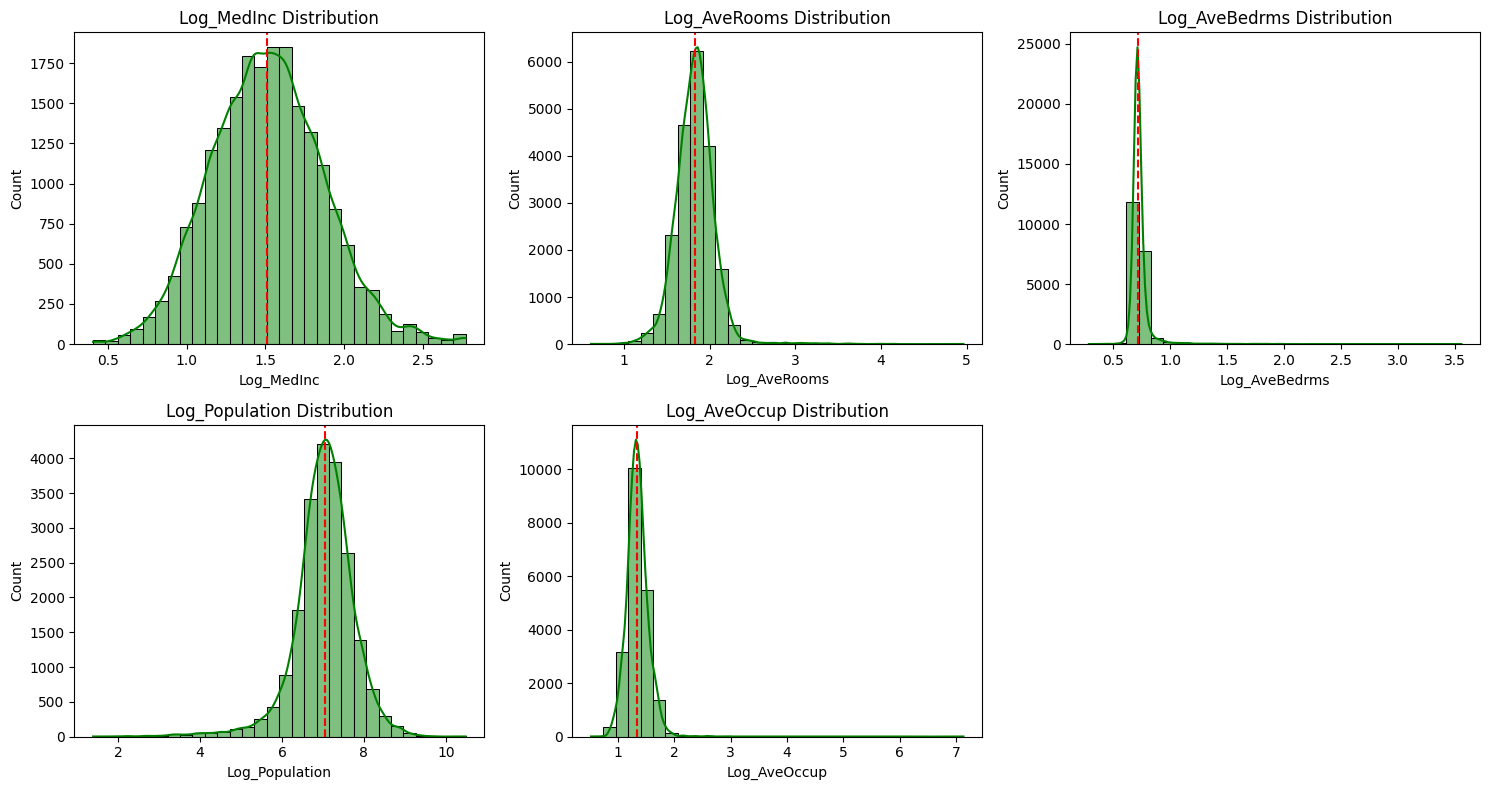

In [226]:

log_cols = ['Log_MedInc', 'Log_AveRooms', 'Log_AveBedrms', 'Log_Population', 'Log_AveOccup']

plt.figure(figsize=(15, 8))
for i, col in enumerate(log_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='green')
    plt.axvline(df[col].median(), color='red', linestyle='dashed')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

In [227]:
# Drop the original skewed columns
df.drop(['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup'], axis=1, inplace=True)

In [228]:
X = df.drop('target', axis=1)
y = df["target"]

In [230]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [235]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lin_reg', LinearRegression()) 
])

In [242]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'lin_reg__fit_intercept': [True, False],
    'lin_reg__copy_X': [True]      
}

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,                         
    scoring='neg_mean_squared_error', 
    n_jobs=-1
)

In [243]:
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score (Negative MSE):", grid.best_score_)

Best Params: {'lin_reg__copy_X': True, 'lin_reg__fit_intercept': True}
Best Score (Negative MSE): -0.4954123636787583


In [245]:
from sklearn.metrics import mean_squared_error
y_pred = grid.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", rmse)

Test RMSE: 0.7136160966676303


In [248]:
from sklearn.linear_model import Ridge

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

param_grid = {
    'ridge__alpha': [0.01, 0.1, 1.0, 10.0],
    'ridge__fit_intercept': [True, False]
}

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,                         
    scoring='neg_mean_squared_error', 
    n_jobs=-1
)


In [ ]:
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score (Negative MSE):", grid.best_score_)

Best Params: {'ridge__alpha': 1.0, 'ridge__fit_intercept': True}
Best Score (Negative MSE): -0.4954122277973535


In [250]:
from sklearn.metrics import mean_squared_error
y_pred = grid.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", rmse)

Test RMSE: 0.7136132928672311


In [256]:
from sklearn.preprocessing import PolynomialFeatures
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])

param_grid = {
    'lin_reg__fit_intercept': [True, False],
    'lin_reg__copy_X': [True]
}

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)


In [257]:
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score (Negative MSE):", grid.best_score_)

Best Params: {'lin_reg__copy_X': True, 'lin_reg__fit_intercept': True}
Best Score (Negative MSE): -0.38037523210995894


In [258]:
from sklearn.metrics import mean_squared_error
y_pred = grid.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", rmse)

Test RMSE: 0.6165553569514493
